In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [46]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 20})

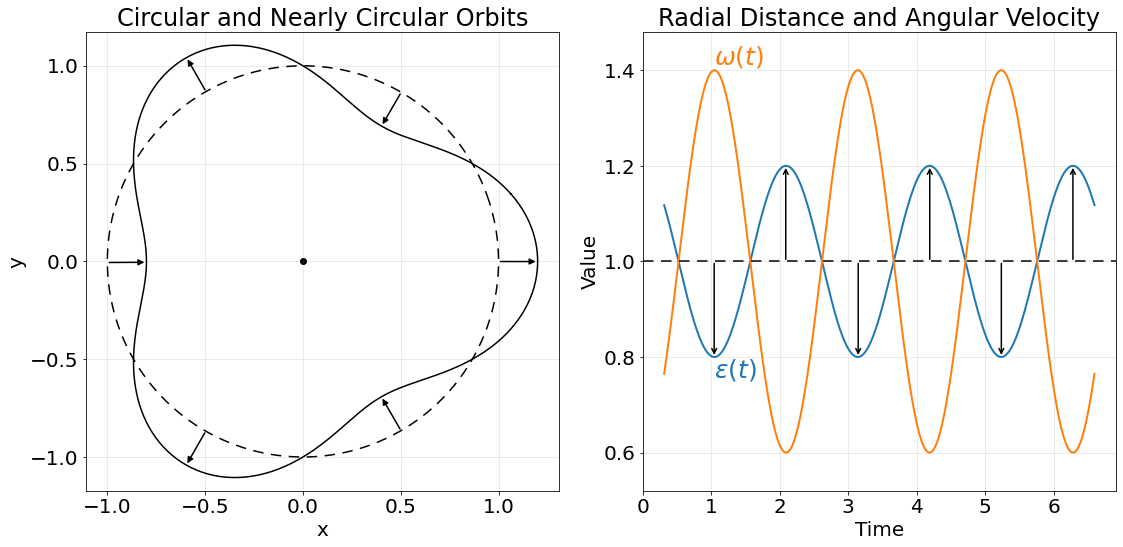

In [56]:
# Set up parameters for the orbits
R = 1  # radius of circular orbit
epsilon_amplitude = 0.2  # larger perturbation amplitude for nearly circular orbit
Omega = 1  # angular velocity for circular orbit

# Time array from 0.1*pi to 2.1*pi
time = np.linspace(0.1 * np.pi, 2.1 * np.pi, 500)

# Circular orbit (constant radius)
x_circular = R * np.cos(Omega * time)
y_circular = R * np.sin(Omega * time)

# Nearly circular orbit with larger radial deviation
epsilon = epsilon_amplitude * np.cos(3 * Omega * time)  # radial oscillation with larger amplitude
r_near_circular = R + epsilon
x_near_circular = r_near_circular * np.cos(Omega * time)
y_near_circular = r_near_circular * np.sin(Omega * time)

# Calculate radial distance and angular velocity
radial_distance = r_near_circular  # R + ε(t)
angular_velocity = Omega + (-2 * epsilon * Omega / R)  # from Rω = -2εΩ

# Find maxima and minima in the radial distance
max_peaks, _ = find_peaks(radial_distance)
min_peaks, _ = find_peaks(-radial_distance)

# Create a two-panel figure
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Panel 1: Circular and Nearly Circular Orbits with Marked Maxima and Minima Deviations
axs[0].plot(x_circular, y_circular, color="black", linestyle=(0, (7, 5)))
axs[0].plot(x_near_circular, y_near_circular, color="black", linestyle="-")
axs[0].scatter([0], [0], color="black", marker="o")  # Center of Potential

# Mark all maxima deviations with arrows (black)
for idx in max_peaks:
    x_circ = x_circular[idx]
    y_circ = y_circular[idx]
    x_near = x_near_circular[idx]
    y_near = y_near_circular[idx]
    axs[0].annotate('', xy=(x_near, y_near), 
                    xytext=(x_circ, y_circ),
                    arrowprops=dict(arrowstyle='-|>', color='black', lw=1.5, mutation_scale=12))

# Mark all minima deviations with arrows (black)
for idx in min_peaks:
    x_circ = x_circular[idx]
    y_circ = y_circular[idx]
    x_near = x_near_circular[idx]
    y_near = y_near_circular[idx]
    axs[0].annotate('', xy=(x_near, y_near), 
                    xytext=(x_circ, y_circ),
                    arrowprops=dict(arrowstyle='-|>', color='black', lw=1.5, mutation_scale=12))

# Formatting for Panel 1
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("Circular and Nearly Circular Orbits")
axs[0].axis("equal")
axs[0].grid(True)
# Make grid paler
axs[0].grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# -----------------------

# Panel 2: Radial Distance and Angular Velocity as Functions of Time with Peak Markers and Arrows
axs[1].plot(time, radial_distance, color="tab:blue", lw=2)
axs[1].plot(time, angular_velocity, color="tab:orange", lw=2)
# Each dash is 7 points long and there are 5 points between dashes
axs[1].axhline(y=R, color="black", linestyle=(0, (7, 5)))

# Add vertical arrows in Panel 2 from the circular orbit radius to maxima and minima
for idx in max_peaks:
    axs[1].annotate('', xy=(time[idx], radial_distance[idx]), xytext=(time[idx], R),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1.5, mutation_scale=12))

for idx in min_peaks:
    axs[1].annotate('', xy=(time[idx], radial_distance[idx]), xytext=(time[idx], R),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1.5, mutation_scale=12))

# Formatting for Panel 2
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Value")
axs[1].set_title("Radial Distance and Angular Velocity")

# Set y-limits for Panel 2 based on computed min and max
# Compute min and max of the radial distance and angular velocity curves
radial_distance_min = np.min(radial_distance)
radial_distance_max = np.max(radial_distance)
angular_velocity_min = np.min(angular_velocity)
angular_velocity_max = np.max(angular_velocity)

# Determine the y-limits for the second panel by taking the min and max across both curves
y_min = min(radial_distance_min, angular_velocity_min)
y_max = max(radial_distance_max, angular_velocity_max)

axs[1].set_ylim([y_min-0.1*(y_max-y_min), y_max+0.1*(y_max-y_min)])

# Make grid paler
axs[1].grid(True)
axs[1].grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# Label curves
axs[1].text(time[min_peaks[0]], radial_distance[min_peaks[0]], r'$\varepsilon(t)$', va='top',
            ha='left', c='tab:blue', fontsize=25)
axs[1].text(time[min_peaks[0]], angular_velocity[min_peaks[0]], r'$\omega(t)$', va='bottom',
            ha='left', c='tab:orange', fontsize=25)

plt.tight_layout()

# Save the figure
plt.savefig("../Figures/nearly_circular_orbit.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()
